## Exploratory Data Analysis On Electric Vehicle Population

#### What is Exploratory Data Analysis?
Exploratory Data Analysis (EDA) is the process of analyzing a dataset in order to understand its main characteristics, patterns and identify anomalies. EDA is often the first step in the data analysis process.

It involves using different graphs and plots to help visualise the data and also uses statistical methods to draw inferences from the data.

The goal of EDA is not to arrive at a certain right answer or to confirm a pre-defined hypothesis. It is an exploratory process to draw inferences and get ideas on how the data can be further utilised to predict certain outcomes/develop ML models


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [10]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 445
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [51]:
data = data[~data['Postal Code'].isna()]
data['Postal Code'] = data['Postal Code'].dropna().astype('int')


In [52]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 441
DOL Vehicle ID                                         0
Vehicle Location                                       6
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [53]:
data.shape

(210161, 17)

In [54]:
data['State'].unique()

array(['WA', 'MI', 'OR', 'CA', 'KS', 'VA', 'KY', 'DC', 'AL', 'NE', 'NM',
       'IL', 'CT', 'MO', 'TX', 'MD', 'NJ', 'NC', 'OH', 'HI', 'NH', 'SC',
       'IN', 'PA', 'MA', 'FL', 'CO', 'NV', 'DE', 'AR', 'ID', 'NY', 'MN',
       'GA', 'AZ', 'TN', 'RI', 'OK', 'AK', 'IA', 'UT', 'WY', 'LA', 'WI'],
      dtype=object)

In [55]:
unique_data = data.drop_duplicates(subset=['VIN (1-10)'],keep='last')

In [56]:
unique_data.shape

(12377, 17)

In [57]:
unique_data['Count'] = 1

C:\Users\BhanuExflow\AppData\Local\Temp\ipykernel_11104\593460657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['Count'] = 1


C:\Users\BhanuExflow\AppData\Local\Temp\ipykernel_11104\388957349.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(unique_data.corr(),annot=True)


<Axes: >

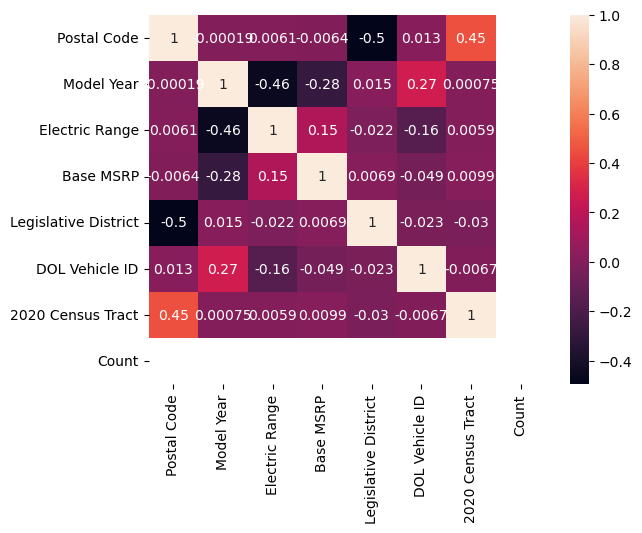

In [58]:
sns.heatmap(unique_data.corr(),annot=True)

In [59]:
company_wise = unique_data.groupby(['Make']).aggregate({'Count':'sum'})

In [60]:
company_wise.sort_values(by='Count',ascending=False,inplace=True)
company_wise.reset_index(inplace=True)


Text(0.5, 1.0, 'Top 15 Electric Vehicle Sales Company wise')

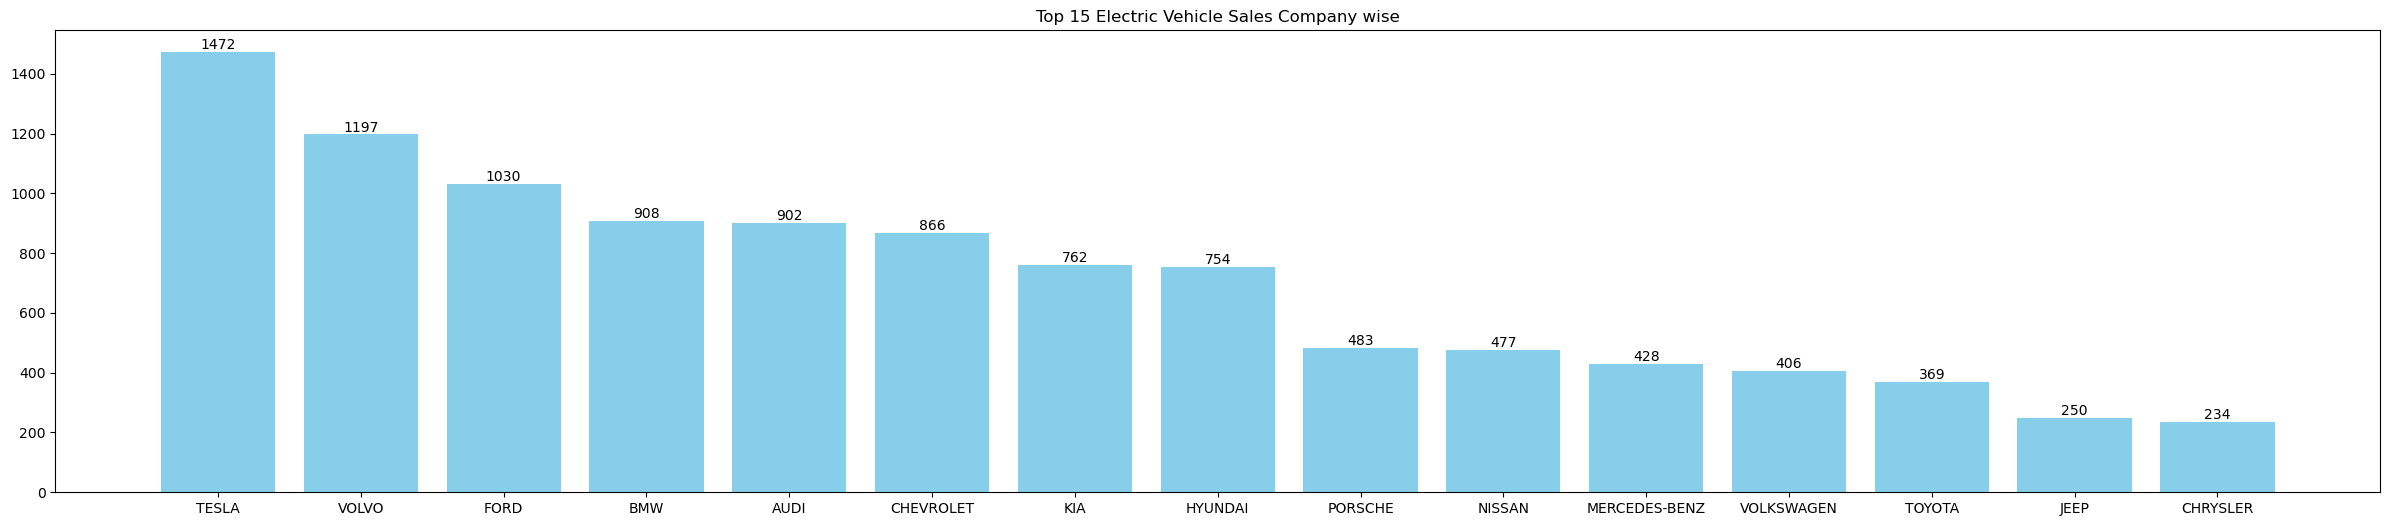

In [61]:
plt.figure(figsize=(30,6))
bars = plt.bar(company_wise['Make'][:15], company_wise['Count'][:15], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate of the label
        height,                             # Y coordinate (height of the bar)
        f'{height}',                        # Text (the height of the bar)
        ha='center',                        # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )
    
plt.title("Top 15 Electric Vehicle Sales Company wise")

([<matplotlib.patches.Wedge at 0x1904f930700>,
 [Text(1.0099841129749494, 0.4358119910445384, 'TESLA'),
  Text(0.45335371100811217, 1.0022327138520142, 'VOLVO'),
  Text(-0.20937196261616103, 1.0798904487355452, 'FORD'),
  Text(-0.7317807136273211, 0.8212776553414131, 'BMW'),
  Text(-1.0362741171114147, 0.3689660610475689, 'AUDI'),
  Text(-1.088099732747846, -0.16136595549887933, 'CHEVROLET'),
  Text(-0.9092543902032069, -0.6190770985072817, 'KIA'),
  Text(-0.5782224811883314, -0.9357664036758373, 'HYUNDAI'),
  Text(-0.23054859903603114, -1.0755683815929713, 'PORSCHE'),
  Text(0.05994069547993575, -1.098365655428729, 'NISSAN'),
  Text(0.3302925412344281, -1.0492410767811675, 'MERCEDES-BENZ'),
  Text(0.5615588941926368, -0.9458602477919997, 'VOLKSWAGEN'),
  Text(0.7500052867152205, -0.8046689194316008, 'TOYOTA'),
  Text(0.8761976856972628, -0.6650395594088828, 'JEEP'),
  Text(0.9571613709122457, -0.5420720524371188, 'CHRYSLER'),
  Text(1.0191555641489625, -0.41391054113686243, 'RIVIAN'),

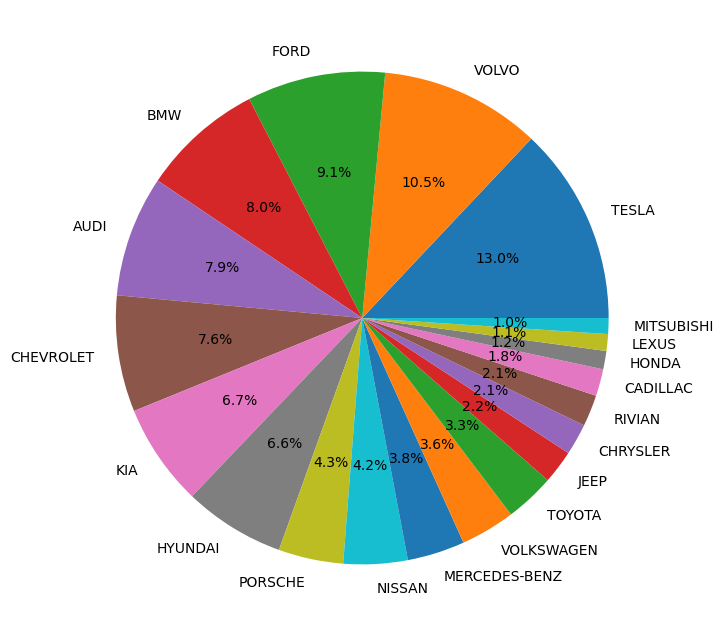

In [62]:
## Company wise market percentage
plt.figure(figsize=(15,8))
plt.pie(company_wise['Count'][:20],autopct='%1.1f%%',labels=company_wise['Make'][:20])

In [63]:
### Vehicle Model wise price over years
vehicle_price = unique_data.groupby(['Model Year','Make', 'Model'], as_index=False).agg({'Base MSRP': 'last'})
vehicle_price[vehicle_price['Base MSRP'] != 0].sort_values(by='Make')

,Model Year,Make,Model,Base MSRP
69,2016,BMW,330E,43700.0
129,2018,BMW,530E,52650.0
128,2018,BMW,330E,45600.0
164,2019,BMW,740E,91250.0
163,2019,BMW,530E,55700.0
97,2017,BMW,740E,89100.0
96,2017,BMW,330E,44100.0
130,2018,BMW,740E,90700.0
101,2017,CADILLAC,CT6,75095.0
133,2018,CADILLAC,CT6,75095.0


In [64]:
## Vehcile used by Different DOL vehicle ID's
DOL_Data = data.groupby(['VIN (1-10)','Make'],as_index=False).agg({'DOL Vehicle ID':'count'})
DOL_Data.sort_values(by='DOL Vehicle ID',ascending=False,inplace=True)
DOL_Data

,VIN (1-10),Make,DOL Vehicle ID
5575,7SAYGDEE6P,TESLA,1215
5578,7SAYGDEE7P,TESLA,1214
5587,7SAYGDEEXP,TESLA,1174
5572,7SAYGDEE5P,TESLA,1174
5581,7SAYGDEE8P,TESLA,1162
...,...,...,...
7128,KMHC75LD6N,HYUNDAI,1
7127,KMHC75LD6M,HYUNDAI,1
7126,KMHC75LD6K,HYUNDAI,1
7125,KMHC75LD5M,HYUNDAI,1


<Axes: xlabel='VIN (1-10)', ylabel='DOL Vehicle ID'>

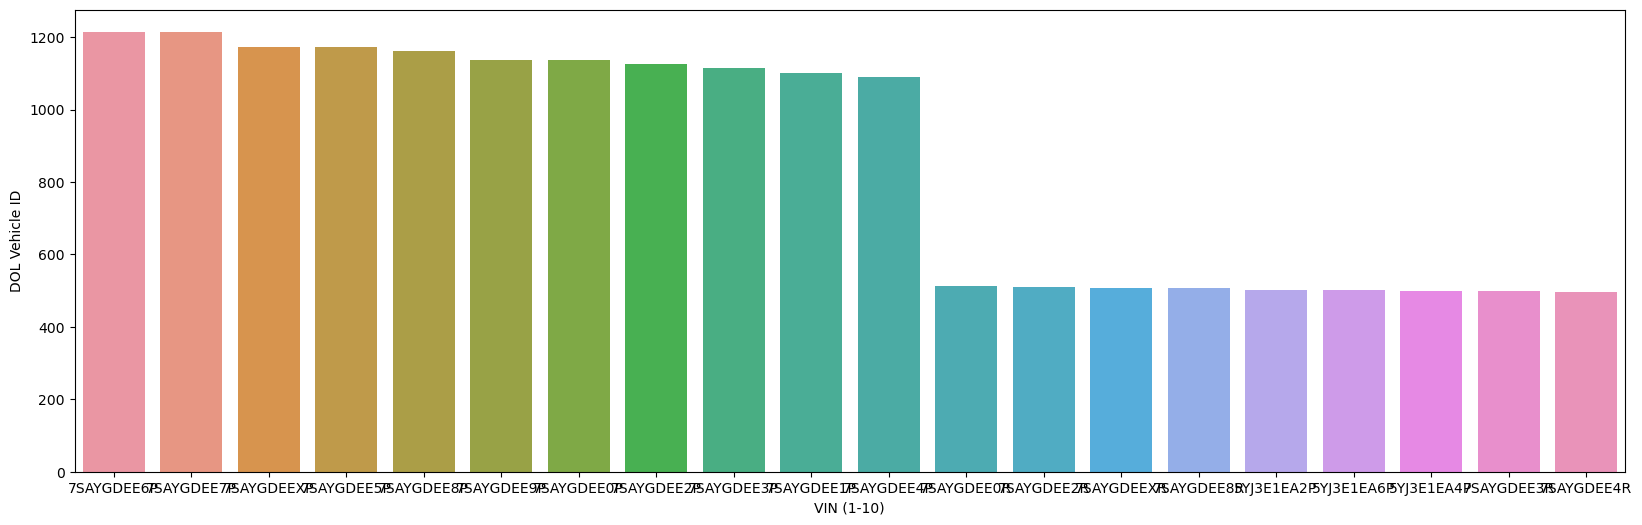

In [65]:
plt.figure(figsize=(20, 6))  # width=12, height=6 (in inches)
sns.barplot(data=DOL_Data[:20],x='VIN (1-10)',y='DOL Vehicle ID')

In [69]:
pincode_counts = data.groupby(['Postal Code','Make']).size().reset_index(name='Count')
pincode_counts.sort_values(by='Count',ascending=False,inplace=True)

In [70]:
pincode_counts

,Postal Code,Make,Count
1548,98052,TESLA,3089
748,98012,TESLA,2390
594,98006,TESLA,2064
528,98004,TESLA,2011
1199,98033,TESLA,1870
...,...,...,...
5190,98387,GMC,1
5199,98387,MITSUBISHI,1
5214,98388,MAZDA,1
5215,98388,MERCEDES-BENZ,1


In [80]:
### City wise Sales

Citywise_data = unique_data.groupby('City',as_index=False).size().sort_values(by='size',ascending=False)


,City,size
298,Seattle,1453
332,Tacoma,483
319,Spokane,380
17,Bellingham,371
275,Redmond,345
...,...,...
195,McCleary,1
201,Metaline,1
204,Mineral,1
206,Montclair,1


#### City wise EV's Sales

<BarContainer object of 15 artists>

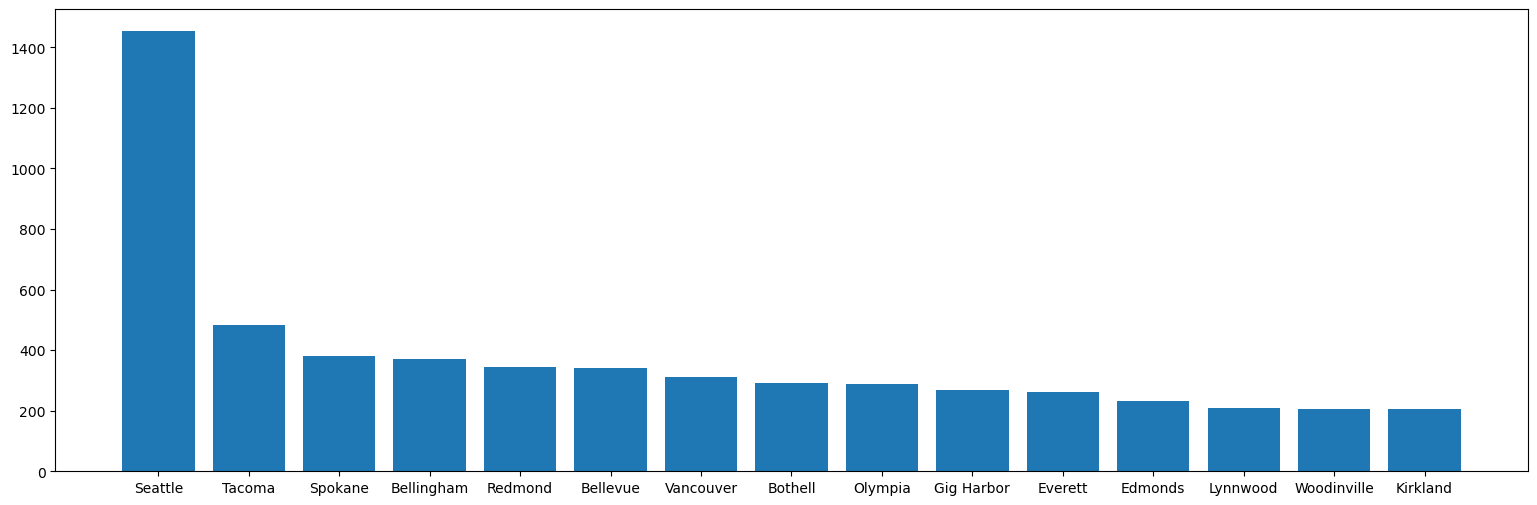

In [86]:
plt.figure(figsize=(19,6))
plt.bar(Citywise_data['City'][:15],Citywise_data['size'][:15],data=Citywise_data)
